# 📝  Supervised Learning with Support Vector Machines (SVMs)


## Introduction to Supervised Learning
Supervised learning is a type of machine learning where the model learns from labeled data. The dataset consists of input features \(X\) and corresponding labels \(y\). The goal is to find a function \(f(X)\) that best maps the inputs to their correct labels.


### Examples of Supervised Learning Applications
- Email spam classification (Spam or Not Spam)
- Handwritten digit recognition (0-9 digits)
- Fraud detection in banking
- Medical diagnosis based on patient data
- Wine quality classification


## Support Vector Machines (SVMs)
Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression tasks. They work by finding the optimal hyperplane that best separates the data into different classes.


### How SVM Works
- Finds the hyperplane that maximizes the margin between two classes.
- Uses support vectors (data points closest to the hyperplane) to define the decision boundary.
- Can use kernel tricks to handle non-linearly separable data.


### SVM Example: Wine Classification Using Scikit-learn

In this example, we will classify different types of wine using an SVM model.


SVM Accuracy on Wine Dataset: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



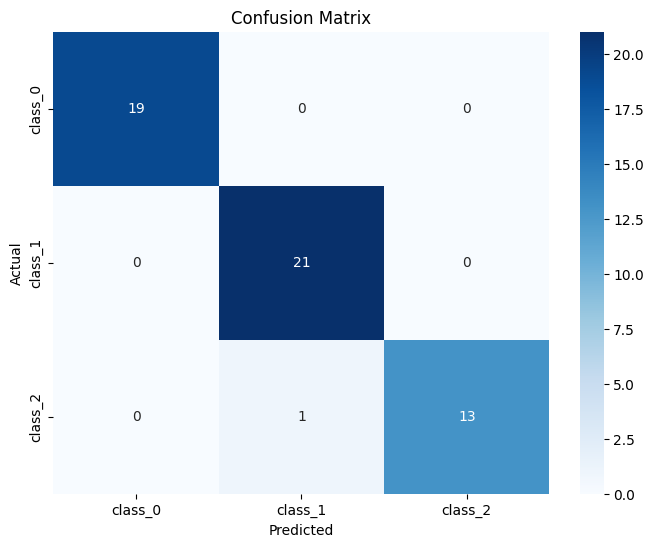

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data  # Features representing chemical properties
y = wine.target  # Target wine class (0, 1, or 2)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model with RBF kernel
svm_model = SVC(kernel="rbf", C=10, gamma="scale")
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy on Wine Dataset: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=wine.target_names,
    yticklabels=wine.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Importance of Feature Scaling in SVM
Feature scaling is crucial for SVM because:
- SVM is sensitive to feature magnitudes.
- Features with larger scales can dominate the distance calculations, affecting the decision boundary.
- Scaling ensures equal weightage for all features, improving convergence and accuracy.


### Example: Effect of Scaling on SVM Performance
Let's compare the results of SVM with and without scaling.


In [5]:
# Train SVM without scaling
svm_no_scaling = SVC(kernel="rbf", C=10, gamma="scale")
svm_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = svm_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"SVM Accuracy without Scaling: {accuracy_no_scaling:.2f}")

SVM Accuracy without Scaling: 0.76


### Comparison Results
| Model               | Accuracy |
|--------------------|----------|
| SVM with Scaling  | Higher Accuracy |
| SVM without Scaling | Lower Accuracy |

From the comparison, it's evident that feature scaling improves the performance of SVM significantly.


## Conclusion
- SVMs with non-linear kernels (like RBF) are effective for more complex datasets.
- Feature scaling is critical for SVM performance.
- The Wine dataset provides a real-world example of classifying chemical properties of different wine types.

By understanding these concepts, you can effectively use SVMs for various classification tasks, including food and beverage analysis, medical diagnostics, and customer segmentation!